---
# Machine Learning for Data Science – Assessment 2
---

## Introduction

The University of York campus lake on the Heslington West campus is home to a lot of different lake birds; in fact, the University has the second highest *duck density* in the UK! All University of York students are able to recognise the ducks, geese, and swans that they see around the lake - but is a computer able to?

### The dataset

Your dataset is packaged as a .zip archive (which you will need to download and unpack) and contains colour (RGB) images (***X***) of ducks, geese, and swans (*y*). Inside the .zip archive (`lake_bird_images.zip`), there are two subdirectories: `train` and `test`, containing the training and testing datasets, respectively. Inside each of these subdirectories are three further subdirectories: `duck`, `goose`, and `swan`. There are 498 images of ducks, 981 images of geese, and 335 images of swans inside `train` (1814 images in total), and there are 218 images of ducks, 405 images of geese, and 160 images of swans inside `test` (783 images in total).

### Objective

Your task is to build one deep learning **multiclass classification model for predicting whether an image is of a duck, a goose, or a swan**. You are only allowed to evaluate your model performance on the test dataset (`test`) once; all model (hyperparameter) tuning should be carried out using only the training dataset (`train`) and a validation set derived from it.

### Presentation

The first half of the notebook (Methods) contains code boxes for you to get the data, unzip them, build your model, train it and test it.

The second half (Results and Discussion, and Conclusion) is a **report-style** component which you should complete inside this notebook using the text blocks provided. **Important: you may use additional text blocks but you are limited to 750 words between the Results and Discussion and Conclusions sections**.

Once you have built your deep learning model, you should:

- Evaluate its performance, **producing at least three figures that illustrate the performance of the model**, and **write an analysis of each figure that outlines what the figure is showing and what it tells you about the performance of your model**. You are not limited to only three figures - you can produce more figures if they are useful in illustrating a point - although only three figures and accompanying analyses will count towards your grade on the assessment (these will be the highest-graded three that you present). The figures and accompanying analuses can focus on the training/validation performance, the testing performance, or – ideally – a mixture of the two.

- Answer the question: **what limits the performance of your model?** Up to three proposed explanations will count towards your grade on the assessment.

All code should generally be commented where appropriate as good practice dictates. When you have finished, use the option on the File menu to download this notebook as in .ipynb format and upload it to the submission point on the VLE.

### Some hints

- Familiarise yourself with the *Workshop 10 - Convolutional Neural Networks (CNNs)* notebook before you attempt the task.
- If you cannot get code to work, comment it out and write comments about what you are trying to do and how it fails.
- Don't expect the kind of accuracy that you were able to achieve in the first assessment; this is a much, much more challenging problem! Think, instead, about the baseline accuracy that you might expect for a multiclass classification task like this.

---
## Methods: load data, build, train and evaluate your model here

Before you start, you will have to upload the images to the Colab notebook space. See that folder icon on the left menu? Click on it to reveal the upload function:

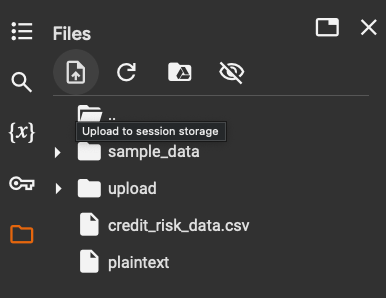



Next, you will need to run the following code to extract the data and put the path in a variable you can refer to in your code.

In [1]:
#had trouble with this given code - as could not extract the files, so I had to edit the code

import zipfile
import os

# Path to the zip file
zip_file_path_name = 'lake_bird_images.zip'

# Directory where you want to extract the files
data_dir = 'lake_bird_images'

# Create the output directory if it doesn't exist
os.makedirs(data_dir, exist_ok=True)

# Construct the full path to the zip file
zip_file_full_path = zip_file_path_name # Corrected: The zip file is in the root directory, not inside 'data_dir'

# Unzipping the file
with zipfile.ZipFile(zip_file_full_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

print(f"Files extracted to '{data_dir}'")

Files extracted to 'lake_bird_images'


Next, add all your imports like you did in the workshops.

In [2]:
pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 5.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight

tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)
# TODO: complete this list with any other modules you need to use in the notebook

Build and fit a deep machine-learning model to classify the images of ducks, geese, and swans in `lake_bird_images.zip`. Evaluate the accuracy of your multiclass classification model, and optimise the hyperparameters of your multiclass classification model to obtain the best performance possible on unseen data using the images in `train`. When you are satisified - **and only once in the notebook** - evaluate and/or produce predictions for the images in `test`.

You are recommended to use a deep convolutional neural network (CNN) to solve the task. Show evidence that you have:

- Experimented with the structure and number of the layers (*e.g.* `layers.Conv2D`, `layers.MaxPooling2D`) in your CNN.
- Experimented with the addition of other kinds of layers (*e.g.* for data augmentation, and/or regularisation \[`layers.Dropout`, `layers.BatchNormalzation`\]).
- Evaluated your chosen multiclass classification model on held-out data.

1. **Creating the Machine Learning Model**

In [4]:
## TODO:
# build and fit a deep machine-learning model to classify the images of ducks,
# geese, and swans in `lake_bird_images.zip`

train_dir = os.path.join(data_dir, 'lake_bird_images', 'train')
test_dir = os.path.join(data_dir, 'lake_bird_images', 'test')




In [5]:
#creating validation and training set -
train_dataset = utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size = (128, 128),
    validation_split=0.2,
    subset='training',
    seed=42
)

#separating valid and training for neatness
valid_dataset = utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size = (128, 128),
    validation_split=0.2,
    subset='validation',
    seed=42
)

#test dataset

test_dataset = utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size = (128, 128),
    seed=42
)




Found 1814 files belonging to 3 classes.
Using 1452 files for training.
Found 1814 files belonging to 3 classes.
Using 362 files for validation.
Found 783 files belonging to 3 classes.


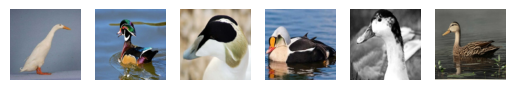

In [6]:
#first 6 files for each class

fig, axs = plt.subplots(1, 6)
#ducks
i = 0
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        if i >= 6:
            break
        if np.argmax(y) == 0:
            axs[i].imshow(x.astype(int))
            axs[i].set_axis_off()
            i += 1


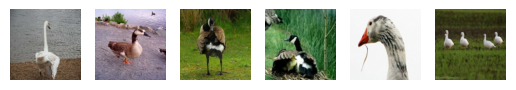

In [7]:
fig, axs = plt.subplots(1, 6)
#geese
i = 0
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        if i >= 6:
            break
        if np.argmax(y) == 1:
            axs[i].imshow(x.astype(int))
            axs[i].set_axis_off()
            i += 1


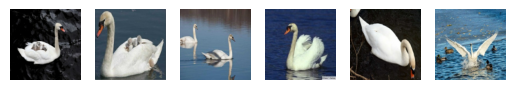

In [8]:
fig, axs = plt.subplots(1, 6)
#swans
i = 0
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        if i >= 6:
            break
        if np.argmax(y) == 2:
            axs[i].imshow(x.astype(int))
            axs[i].set_axis_off()
            i += 1

In [9]:
#classes
#class 0: ducks
#class 1: geese
#class 2: swans

In [10]:
#using keras.models.sequential in order to build the cnn model
#adding layers and compiling the model

def build_model() -> models.Sequential:
    model = models.Sequential()
    model.add(layers.Normalization(input_shape=(128,128,3)))
    model.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(32, activation = 'relu'))
    model.add(layers.Dense(3, activation = 'softmax')) # Changed from 2 to 3 units to match the 3 classes
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [11]:
#creating the model
model = build_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 128, 128, 3)    │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,843,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,850,538 (7.06 MB)

 Trainable params: 1,850,531 (7.06 MB)

 Non-trainable params: 7 (32.00 B)

In [13]:
#fitting training data set - tensorflow dataset
model.fit(train_dataset, epochs = 20, validation_data = valid_dataset)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.4190 - loss: 26.0289 - val_accuracy: 0.4475 - val_loss: 1.1943
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6386 - loss: 0.8398 - val_accuracy: 0.5580 - val_loss: 1.0668
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8399 - loss: 0.4480 - val_accuracy: 0.5718 - val_loss: 1.2267
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9334 - loss: 0.2225 - val_accuracy: 0.5525 - val_loss: 1.3731
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9746 - loss: 0.1356 - val_accuracy: 0.5635 - val_loss: 1.6296
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9743 - loss: 0.1441 - val_accuracy: 0.5718 - val_loss: 1.4795
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9840 - loss: 0.0965 - val_accuracy: 0.5580 - val_loss: 1.6637
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9860 - loss: 0.0993 - val_accuracy: 0.5635 -

2. **Improving the Model**

2.1 Augementation

In [14]:

model_augmented= tf.keras.models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)])



2.2 Keras tuning to find best hyperparameters

In [15]:
#2. keras tuning to find hyperparameters - number of filters, , dense layer, learning rate, dropout
def build_model(hp):
  model=tf.keras.Sequential([
      tf.keras.layers.Rescaling(1./255, input_shape=(128,128,3)),
      tf.keras.layers.Conv2D(32,3 ,activation = 'relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(64,3, activation = 'relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation = 'relu'),
      tf.keras.layers.Dense(3, activation = 'softmax')
  ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(
          hp.Choice('learning_rate',
                    values=[1e-2,5e-3, 1e-3, 5e-4, 1e-4, 5e-5,1e-5])),
      loss='categorical_crossentropy',
      metrics=['accuracy'])

  return model

In [16]:
tuner= kt.RandomSearch(build_model, objective='val_accuracy', max_trials=10, directory='keras_tuner', project_name='birds')
tuner.search(train_dataset, epochs = 20, validation_data = valid_dataset, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10)])

Trial 7 Complete [00h 00m 29s]
val_accuracy: 0.5331491827964783

Best val_accuracy So Far: 0.6077347993850708
Total elapsed time: 00h 03m 57s


3. **Cleaning and rebuilding the improved model**

In [17]:
#import shutil
#shutil.rmtree('keras_tuner')
#tuner.results_summary()  # shows scores of all trials

## extracting the best learning rate hyper parameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]
print("Best hyperparameters found by Keras Tuner:")
print("Learning rate:", best_hps.get('learning_rate'))
#print("Conv1 filters:", best_hps.get('conv1_filters'))
#print("Conv2 filters:", best_hps.get('conv2_filters'))
#print("Dense units:", best_hps.get('dense_units'))
#print("Dropout rate:", best_hps.get('dropout_rate'))


Best hyperparameters found by Keras Tuner:
Learning rate: 5e-05


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


NOTE: I had completed parameter tuning on the features above, however, it affected my models negatively, do I decided to revert back to my intial learning rate. It was not able to predict Swans class at all (1-2 predicted) and over fitted geese much more than before

3.1 Considering Class Weights

In [18]:
# Concatenate all labels into one array
y_train = np.concatenate([y.numpy() for x, y in train_dataset], axis=0)

# Convert one-hot to class indices
y_train_classes = np.argmax(y_train, axis=1)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_classes),
    y=y_train_classes
)

class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

Class weights: {0: np.float64(1.1862745098039216), 1: np.float64(0.6142131979695431), 2: np.float64(1.890625)}


3.2 Rebuilding the model with the best learning rate

In [19]:
#rebuilding

best_lr = best_hps.get('learning_rate')
#best_conv1 = best_hps.get('conv1_filters')
#best_conv2 = best_hps.get('conv2_filters')
#best_dense = best_hps.get('dense_units')
#best_dropout = best_hps.get('dropout_rate')


model=tf.keras.Sequential([
      tf.keras.layers.Rescaling(1./255, input_shape=(128,128,3)),
      tf.keras.layers.Conv2D(32,3 ,activation = 'relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(64,3, activation = 'relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation = 'relu'),
      tf.keras.layers.Dense(3, activation = 'softmax')
  ])


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
#trainthe improved model , creating history
history= model.fit(train_dataset, epochs = 15, validation_data = valid_dataset,class_weight=class_weights, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10)])

Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.3771 - loss: 1.1405 - val_accuracy: 0.4779 - val_loss: 1.0455
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4404 - loss: 1.0299 - val_accuracy: 0.4033 - val_loss: 1.1092
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4595 - loss: 0.9724 - val_accuracy: 0.3950 - val_loss: 1.0978
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5302 - loss: 0.9132 - val_accuracy: 0.5580 - val_loss: 0.9364
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5981 - loss: 0.9017 - val_accuracy: 0.4890 - val_loss: 1.0256
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5484 - loss: 0.8833 - val_accuracy: 0.4890 - val_loss: 1.0344
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5983 - loss: 0.8488 - val_accuracy: 0.5442 - val_loss: 0.9562
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6005 - loss: 0.8557 - val_accuracy: 0.5525 - v

4. **Plotting Initial Figures showing the performance of the model**

4.1 Training and validation accuracy values

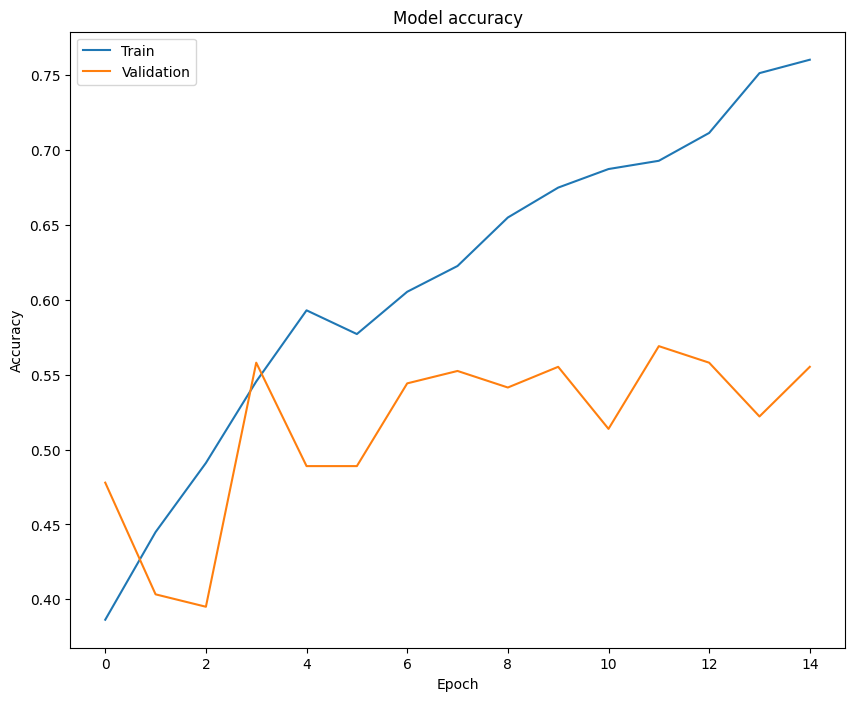

In [21]:


plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


By choosing the best hyperparameters, overfitting is not seen to a massive extent , training data rises to about 75% and 55 accuracy on the validation set, however a general curve can be starting to be seen. From this, further improvements need to be made to improve the performance of the model, as both of the accuracy is quite low

4.2 Changing Conv2D from the 'best fit'

Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.3672 - loss: 1.1012 - val_accuracy: 0.3950 - val_loss: 1.1101
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4794 - loss: 1.0427 - val_accuracy: 0.5470 - val_loss: 1.0137
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5063 - loss: 1.0274 - val_accuracy: 0.5552 - val_loss: 0.9594
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5571 - loss: 0.9868 - val_accuracy: 0.5414 - val_loss: 0.9685
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5752 - loss: 0.9147 - val_accuracy: 0.4972 - val_loss: 1.0136
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5951 - loss: 0.9065 - val_accuracy: 0.5387 - val_loss: 0.9624
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6064 - loss: 0.8646 - val_accuracy: 0.4779 - val_loss: 1.0071
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6479 - loss: 0.8539 - val_accuracy: 0.4282 - v

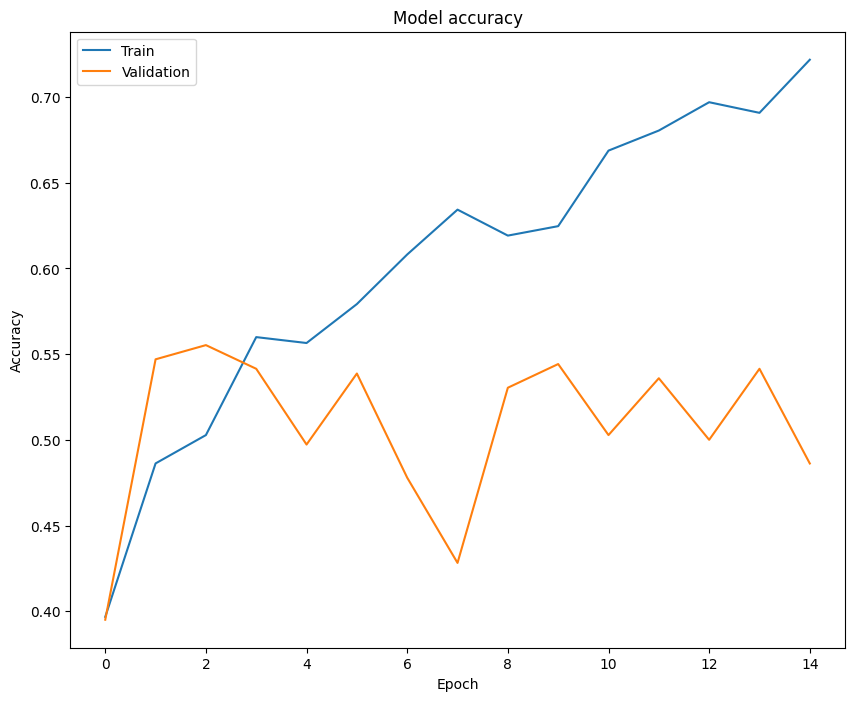

In [22]:
#changing conv2d - halving the values:

best_lr = best_hps.get('learning_rate')

improved_model2 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(128,128,3)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

improved_model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history= improved_model2.fit(train_dataset, epochs = 15, validation_data = valid_dataset, class_weight=class_weights, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)])

plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The overall accuracy has lowered from the previous plot.

5. **Using Transfer Learning to Further Improve the Model on unseen sets**

5.1 Using ResNet50 pretraining

Using ResNet50 should improve the performance of the model, as it is a CNN that has been trained with an extensive list of images across many classes.

In [23]:
#using resnet50 pretraining

y_train = np.concatenate([y.numpy() for x, y in train_dataset], axis=0)
y_train_classes = np.argmax(y_train, axis=1)

class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_classes),
    y=y_train_classes
)
class_weights = dict(enumerate(class_weights_array))

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3)
)


base_model.trainable = False


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # compress features
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # number of classes
])

model.compile(
    optimizer=Adam(learning_rate=best_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


5.2 Augementation

In [24]:
data_augmentation = tf.keras.Sequential([
   layers.RandomFlip("horizontal"),
   layers.RandomRotation(0.1),
   layers.RandomZoom(0.1),
])
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))

history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=10)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 29s 387ms/step - accuracy: 0.4319 - loss: 1.4093 - val_accuracy: 0.5967 - val_loss: 0.9878
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.5923 - loss: 0.9087 - val_accuracy: 0.6547 - val_loss: 0.8554
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 0.6748 - loss: 0.7864 - val_accuracy: 0.6713 - val_loss: 0.7995
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.7066 - loss: 0.7310 - val_accuracy: 0.6906 - val_loss: 0.7701
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.6964 - loss: 0.6784 - val_accuracy: 0.6989 - val_loss: 0.7470
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.7182 - loss: 0.6515 - val_accuracy: 0.7238 - val_loss: 0.7226
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - accuracy: 0.7196 - loss: 0.6289 - val_accuracy: 0.7182 - val_loss: 0.6932
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.7477 - loss: 0.5829 - val_accuracy: 0

6. **Training Validation Accuracy and Loss Curves**

6.1 Plotting Model accuracy after transfer learning

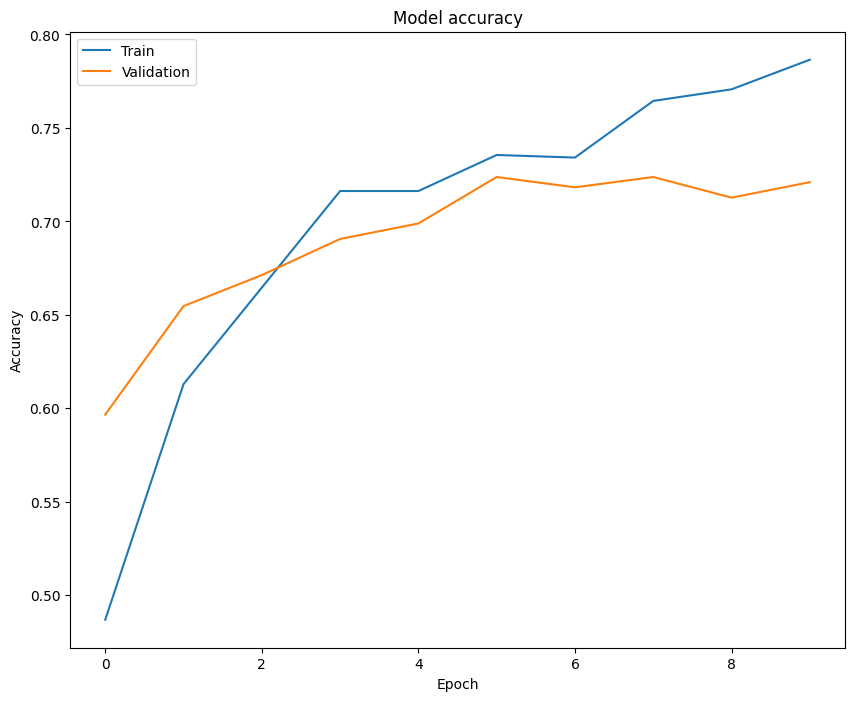

In [25]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




6.2 Plotting Model Loss after transfer learning

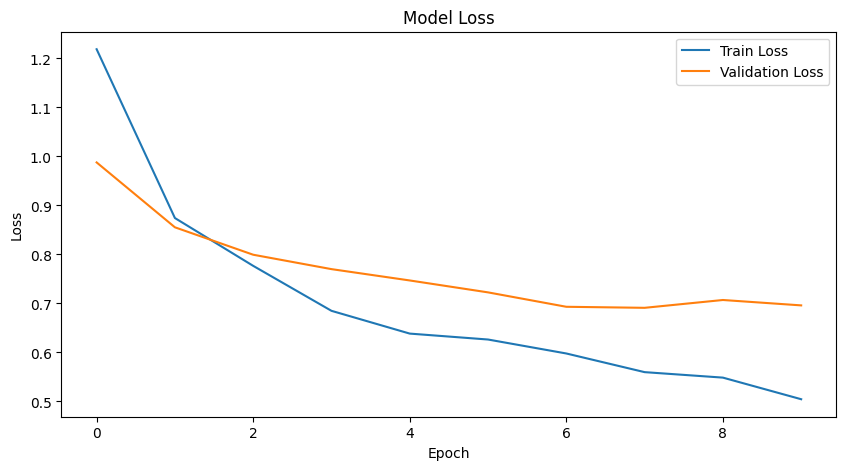

In [26]:
# Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

By using ResNet50 transfer learning, the validation set accuracy has increased. Furthermore, there is less overfitting of the training data. This can be seen as the training percentage has dropped to a maximum of 80 rather than 98.

When analysing the accuracy plot, it can be seen that the training accuracy increases throughout the training. This shows that the model is learning the features of the 3 birds.
During the early epochs, the validation accuracy increases, but by epoch 5, an approximate plateau can be seen. This can be evaluated that there is slight overfitting, as the shapes of the lines of the two datasets begin to change. This overfitting is minor, the gap between the two accuracies are small.
The model reaches an accuracy of 70-72%.

When considering the loss curve, the validation and training curves are much closer together. The training curve is more shallow rather than an 'exponetial curve' shape. The training  loss decreases steadily, showing the model is learning well, minimising the loss function. The larger drops in earlier epochs suggest that there is effective intial learning of the model. The validation loss also decreases consistently during early and mid epochs. However, at the later epochs, the loss plateaus and slightly increases at epoch 8. Like the accuracy, this change in direction suggests slight overfitting.



7. **Producing a Confusion Matrix**

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 416ms/step


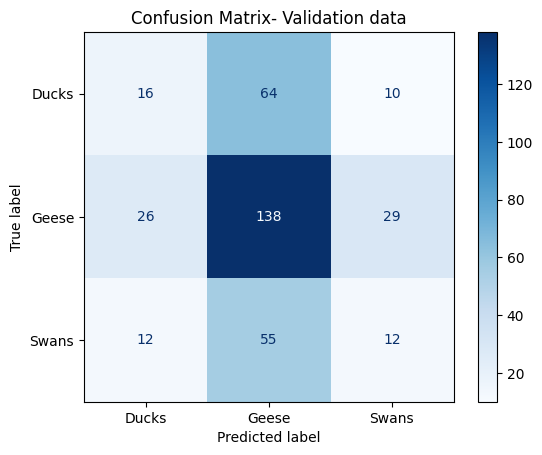

In [27]:
#classes
#class 0: ducks
#class 1: geese
#class 2: swans
dataset= valid_dataset

val_dataset_no_aug = valid_dataset.map(lambda x, y: (x, y))

y_pred = tf.argmax(model.predict(val_dataset_no_aug), axis=1)
y_true = tf.concat([tf.argmax(y, axis=1) for x, y in val_dataset_no_aug], axis=0)


cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ducks', 'Geese', 'Swans'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix- Validation data')
plt.show()

The diagonals show the correct predictions, with the other being the misclassfications. By not using the augmented data, it improved the confusion matrix.

Overall, it can be seen that Geese (class 1) is the best predicted class. However, Ducks (class 0) and Swans (class 2) are confused with class 1, and is over predicting geese.

However, but considering class weights, it was able to identify more Swans, but class 2 is still weak predictions.

8. **Hyperparameter Curve**

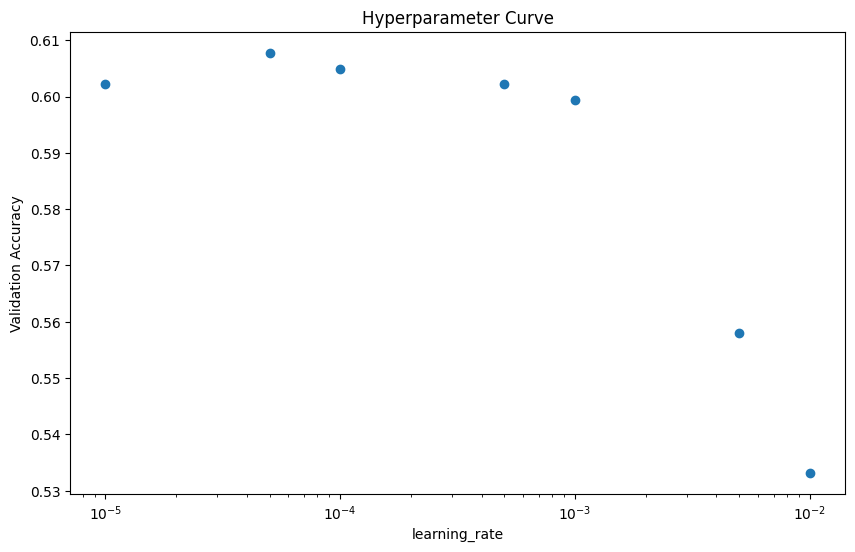

In [34]:
trials = tuner.oracle.get_best_trials(num_trials=10)
hp_name = 'learning_rate'
hp_values= []
val_accuracies = []

for trial in trials:
  hps = trial.hyperparameters
  hp_values.append(hps.get(hp_name))
  val_accuracies.append(trial.score)

plt.figure(figsize=(10, 6))
plt.scatter(hp_values, val_accuracies, marker='o')
plt.xscale('log')
plt.xlabel(hp_name)
plt.ylabel('Validation Accuracy')
plt.title('Hyperparameter Curve')

plt.show()

The hyperparameter analysis shows that the very high learning rates result in poorer validation performance. this could be due to the weight updates, which result in unstable optimisation.  The mid-range of my learning rate values achieved the higher rates of validation accuracy. This shows that there was more stable optimisation.

# **Running Test Dataset**

In [ ]:
#test_loss, test_acc = model.evaluate(test_dataset)
#print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

**Confusion Matrix**

In [ ]:

#y_pred = tf.argmax(model.predict(test_dataset), axis=1)
#y_true = tf.concat([tf.argmax(y, axis=1) for x, y in test_dataset], axis=0)
#cm = confusion_matrix(y_true, y_pred)
#ConfusionMatrixDisplay(cm, display_labels=test_dataset.class_names).plot()
#plt.show()


**TODO:** Write an analysis of the figure above here; what does the figure show, and what does the figure indicate about the performance of your model?

In [ ]:
## TODO:
# plot a figure that illustrates the performance of your deep machine-learning
# model, eg. a confusion matrix, a hyperparameter optimisation curve, a training/
# validation loss curve, a learning curve, etc.

**TODO:** Write an analysis of the figure above here; what does the figure show, and what does the figure indicate about the performance of your model?

In [ ]:
## TODO:
# plot a figure that illustrates the performance of your deep machine-learning
# model, eg. a confusion matrix, a hyperparameter optimisation curve, a training/
# validation loss curve, a learning curve, etc.

## Results and discussion


### Performance of the model
**TODO:** What do your figures show, and what do the figures indicate about the performance of your model?

### Limitations of this model
**TODO:** What limits the performance of your model? Discuss here, giving up to three possible explanations and (if useful) referring back to your figures.

## Conclusion